# In this file
* EDA feature analysis


In [1]:
# To avoid kernel reload on external file change
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# EDA feature analysis
import eda_feature_analysis as EFA


# Feature Analysis is presented in two cases: 
1/ Comparison for all subjects. 

2/ Student Grades based comparison.

# Analyse Features for all subjects

In [3]:
subscript = 'Final' # Choose data source (exam) : Final, midterm_1, midterm_2

# Read Input File
main_folder = './dataframes/All_Subjects/'  # main folder path
file = main_folder + f'Processed_EDA_{subscript}.csv'

print("Selected exam : ",subscript)

EDA_SAMPLING_FREQ = 4 # 4 hz

# columns = All the columns
df = pd.read_csv(file) #, usecols=columns)
print(df.columns)
print("Subjects : ", df['subj'].unique())
t_values = df[df['subj']==df['subj'][0]]['t_sec'].values
print("Signal duration : ", (t_values[1]-t_values[0])*len(t_values)/(60*60), 'hours')



Selected exam :  Final
Index(['subj', 't_sec', 'EDA_Tonic', 'EDA_Phasic', 'EDA_Raw', 'SCR_Peaks',
       'SCR_Amplitude', 'SCR_RiseTime', 'SCR_Amplitude_RiseTime_Ratio'],
      dtype='object')
Subjects :  [ 1  2  3  4  5  6  7  8  9 10]
Signal duration :  3.0 hours


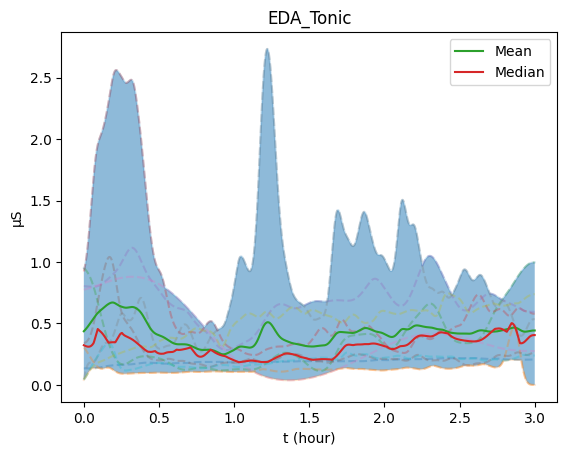

10
Percentage of times increasing: 53.93258426966292 None
Percentage of times decreasing: 46.06741573033708 None
Average percentage of increase: 223.61109419102797
Average percentage of decrease: 61.14392058487387


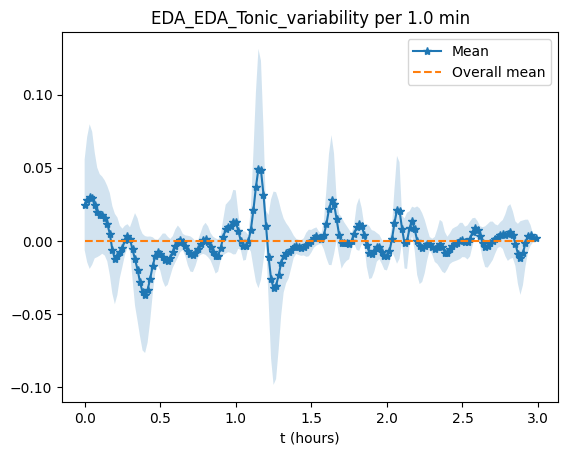

In [4]:
# Analyse Tonic component of EDA signal
# subjects = None => All subjects
EFA.tonic_feature_anlaysis(df, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=None)
EFA.tonic_feature_variability_anlaysis(df, t_sec_ref=0, t_sec_step=1*60, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=None)

len 10


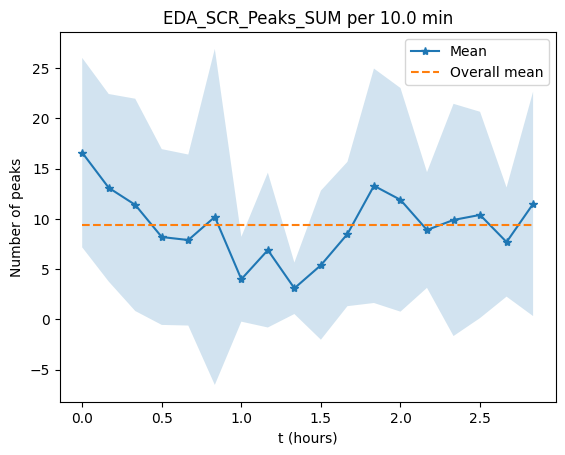

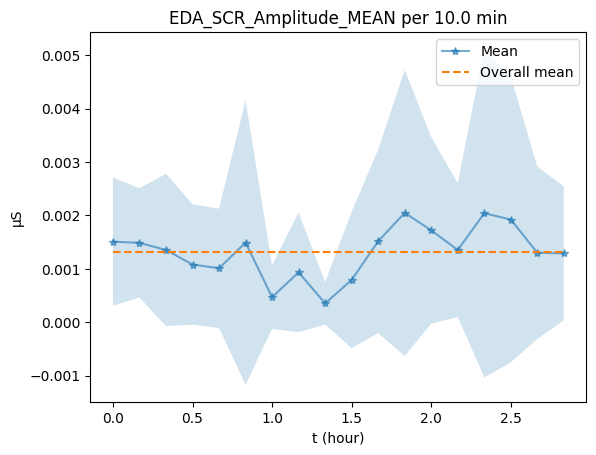

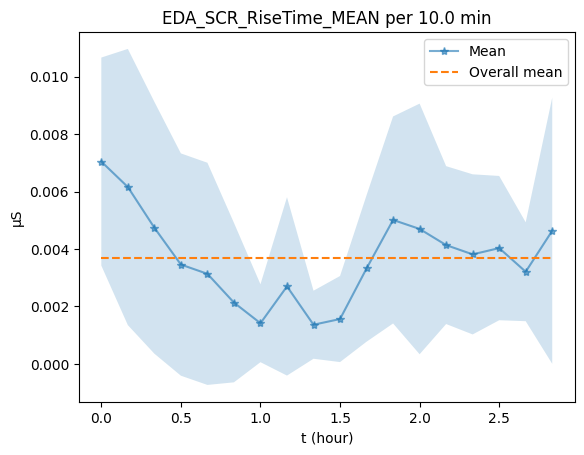

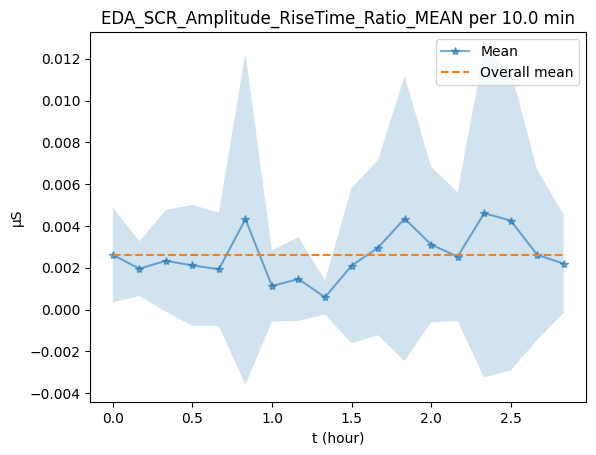

In [5]:
# Phasic : Peak Analysis (per X sec)
# value at each instant t is averaged over X(=step_t_sec) sec.
EDA_SAMPLING_FREQ = 4
start_t_sec = 0
step_t_sec = 10 * 60 # 10 min

EFA.phasic_feature_anlaysis_sum(df, feature='SCR_Peaks', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=None, y_label="Number of peaks")
EFA.phasic_feature_anlaysis_mean(df, feature='SCR_Amplitude', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=None, y_label="µS")
EFA.phasic_feature_anlaysis_mean(df, feature='SCR_RiseTime', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=None, y_label="µS")
EFA.phasic_feature_anlaysis_mean(df, feature='SCR_Amplitude_RiseTime_Ratio', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=None, y_label="µS")


# Grades based analysis

Index(['subj', 'midterm_1', 'midterm_2', 'Final', 'midterm_1_per',
       'midterm_2_per', 'Final_per'],
      dtype='object')
  subj  midterm_1  midterm_2  Final  midterm_1_per  midterm_2_per  Final_per
0    1         78         82    182             78             82       91.0
1    2         82         85    180             82             85       90.0
2    3         77         90    188             77             90       94.0
3    4         75         77    149             75             77       74.5
4    5         67         77    157             67             77       78.5
5    6         71         64    175             71             64       87.5
6    7         64         33    110             64             33       55.0
7    8         92         88    184             92             88       92.0
8    9         80         39    126             80             39       63.0
9   10         89         64    116             89             64       58.0
Subjects :  ['1' '2' '3' '

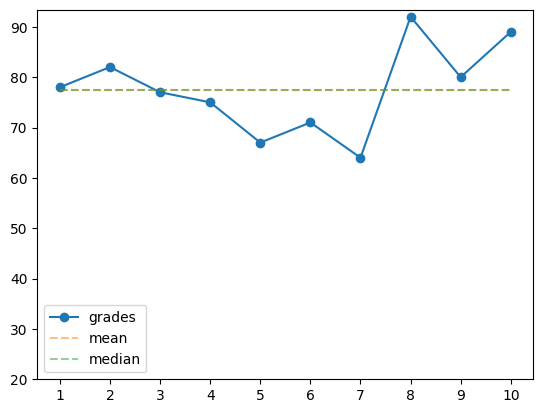

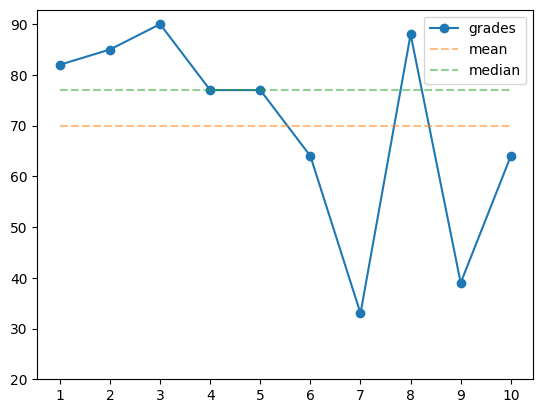

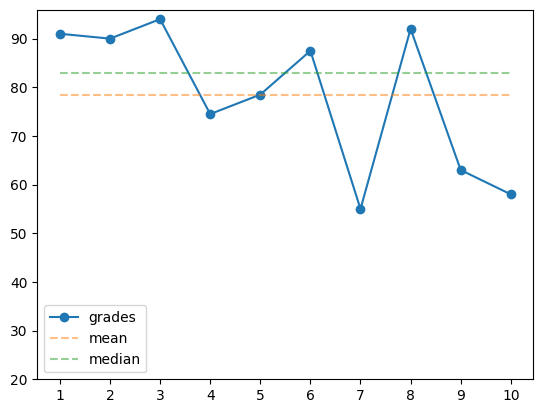

In [6]:
# Read Input File
main_folder = './'  # main folder path
file = main_folder + 'StudentGrades.csv'

EDA_SAMPLING_FREQ = 4 # 4 hz

# columns = All the columns
df_grade = pd.read_csv(file) #, usecols=columns)
print(df_grade.columns)
df_grade = df_grade.iloc[1:]
df_grade.reset_index(inplace=True,drop=True)
print(df_grade)
print("Subjects : ", df_grade['subj'].unique())

def grade_plot(_exam):
    plt.plot(df_grade['subj'], df_grade[_exam], 'o-', label='grades')
    plt.plot(np.ones_like(df_grade[_exam])*df_grade[_exam].mean(axis=0), '--',alpha=0.5, label='mean')
    plt.plot(np.ones_like(df_grade[_exam])*df_grade[_exam].median(axis=0), '--',alpha=0.5, label='median')
    plt.legend()
    plt.ylim(bottom=20)
    plt.show()

print(df_grade[['midterm_1_per', 'midterm_2_per', 'Final_per']].describe())

grade_plot('midterm_1_per')
grade_plot('midterm_2_per')
grade_plot('Final_per')



## Features in selected exam

Selected exam :  midterm_1
Index(['subj', 't_sec', 'EDA_Tonic', 'EDA_Phasic', 'EDA_Raw', 'SCR_Peaks',
       'SCR_Amplitude', 'SCR_RiseTime', 'SCR_Amplitude_RiseTime_Ratio'],
      dtype='object')
Subjects :  [ 1  2  3  4  5  6  7  8  9 10]
Signal duration :  1.5 hours
Cutoff based on exam :  midterm_1
72
Students above cutoff : 
|    |   subj |   midterm_1_per |
|---:|-------:|----------------:|
|  0 |      1 |              78 |
|  1 |      2 |              82 |
|  2 |      3 |              77 |
|  3 |      4 |              75 |
|  7 |      8 |              92 |
|  8 |      9 |              80 |
|  9 |     10 |              89 |
Students below cutoff : 
|    |   subj |   midterm_1_per |
|---:|-------:|----------------:|
|  4 |      5 |              67 |
|  5 |      6 |              71 |
|  6 |      7 |              64 |
midterm_1
For first 0.5 hour
Subj Above Cutoff (Greens) [1, 2, 3, 4, 8, 9, 10]
Subj Below Cutoff (Reds) [5, 6, 7]
For last 0.5 hour
Subj Above Cutoff (Greens) [1, 2, 3

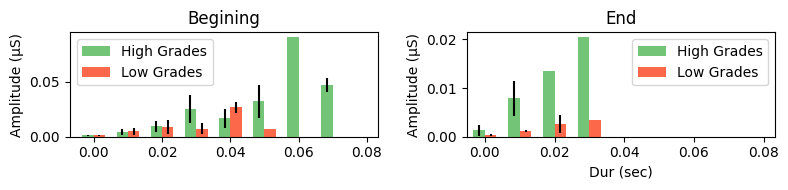

In [14]:
import warnings

warnings.filterwarnings('ignore')

# Choose exam and cutoff logic for analysis
exam = 'midterm_1' # 'Final' , 'midterm_1' , 'midterm_2'
_cutoff_logic = 'first_quartile' # 'mean' 'first_quartile' 'second_quartile'

# Read Input File
main_folder = './dataframes/All_Subjects/'  # main folder path
file = main_folder + f'Processed_EDA_{exam}.csv'

print("Selected exam : ",exam)

EDA_SAMPLING_FREQ = 4 # 4 hz

# columns = All the columns
df_features = pd.read_csv(file) #, usecols=columns)
print(df_features.columns)
print("Subjects : ", df_features['subj'].unique())
t_values = df_features[df_features['subj']==df_features['subj'][0]]['t_sec'].values
print("Signal duration : ", (t_values[1]-t_values[0])*len(t_values)/(60*60), 'hours')

# Condition to seperate students
print("Cutoff based on exam : ",exam)
_cutoffs = {'midterm_1': {'mean':77.5, 
                         'first_quartile': 72,
                         'second_quartile':77.5},
            'midterm_2': {'mean':69.9, 
                         'first_quartile': 64,
                         'second_quartile':77},
            'Final':{'mean':78.35, 
                         'first_quartile': 65.875,
                         'second_quartile':83}
            }

cutoff = _cutoffs[exam][_cutoff_logic] # select cutoff
print(cutoff)

print("Students above cutoff : ")
print(df_grade[df_grade[f'{exam}_per']>cutoff][['subj',f'{exam}_per']].to_markdown())
suj_above_cutoff = df_grade[df_grade[f'{exam}_per']>cutoff]['subj'].astype(int).tolist()

print("Students below cutoff : ")
print(df_grade[df_grade[f'{exam}_per']<=cutoff][['subj',f'{exam}_per']].to_markdown())
suj_below_cutoff = df_grade[df_grade[f'{exam}_per']<=cutoff]['subj'].astype(int).tolist()

import mycolors as CLRS

# Per X sec analysis of Phasic peak Amplitudes to Durations Ratio
# value at each instant t is averaged over X(=step_t_sec) sec.
EDA_SAMPLING_FREQ = 4
start_t_sec = 0
step_t_sec = int(1 * 60) 

def cutoff_based_analysis(_df, suj_below_cutoff, suj_above_cutoff):    
    
    # Above cutoff
    cmap="Greens"
    label="Above Cutoff"
    print(f"Subj {label} ({cmap})", suj_above_cutoff)
    _above_vals =  EFA.phasic_feature_anlaysis_amp_wrt_dur(_df, feature_Amp='SCR_Amplitude', feature_Dur='SCR_RiseTime', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=suj_above_cutoff,cmap=cmap, label=label, show=False)
    
    # Below cutoff
    cmap="Reds"
    label="Below Cutoff"

    if exam == 'Final': # Eliminate student 9
        suj_below_cutoff = [s for s in suj_below_cutoff if s != 9]

    print(f"Subj {label} ({cmap})", suj_below_cutoff)
    _below_vals = EFA.phasic_feature_anlaysis_amp_wrt_dur(_df, feature_Amp='SCR_Amplitude', feature_Dur='SCR_RiseTime', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=suj_below_cutoff,cmap=cmap, label=label, show=True)

    # from sklearn import svm
    # X1 = np.array( map(tuple, _df[].to_numpy())  )
    # Y = np.array([0] * len(male) + [1] * len(female))
    return _above_vals, _below_vals


time_cutoff = 30 * 60 # sec 
print(exam)
print(f"For first {(time_cutoff) / (60*60) } hour")
_first_vals = cutoff_based_analysis(df_features[df_features['t_sec'] < time_cutoff].reset_index(drop=True), suj_below_cutoff=suj_below_cutoff, suj_above_cutoff=suj_above_cutoff) # Warning : The mask 'df['t_sec'] > 60*60' can make t_sec values irrelevant while calling phasic_feature_anlaysis_amp_wrt_dur()

print(f"For last {(time_cutoff) / (60*60) } hour")
_last_vals = cutoff_based_analysis(df_features[df_features['t_sec'] >= (df_features['t_sec'].iloc[-1] - time_cutoff)].reset_index(drop=True), suj_below_cutoff=suj_below_cutoff, suj_above_cutoff=suj_above_cutoff) # Warning : The mask 'df['t_sec'] > 60*60' can make t_sec values irrelevant while calling phasic_feature_anlaysis_amp_wrt_dur()

EFA.show_boxplots(_first_vals, _last_vals)


### Amplitude vs Duration vs Time on exam

For first 0.5 hour
Subj Above Cutoff (Greens) [1, 2, 3, 4, 8, 9, 10]
Nb of sums (7, 30) : [[0.0, 0.0, 0.0, 0.0, 0.014097993153525015, 0.002606694616349756, 0.0019211814878647934, 0.0002417582560434092, 0.0, 0.00018525503507943223, 0.00022652121866518243, 0.0, 0.0, 0.0010767296304480477, 0.0024290833553194504, 0.00035715689573355105, 0.0, 0.0021219649920354235, 0.0005226624397976419, 0.0005622170281030025, 0.0006524711503663803, 0.0007535234079144419, 0.005219582901610536, 0.005505866069379813, 0.007142483574255079, 0.0033201649789667415, 0.006583924769364632, 0.011739432157778711, 0.005773759828701458, 0.0008270222488505971], [0.0, 0.0, 0.002363032955060315, 0.016680211416269176, 0.006630640863195722, 0.005501113402810067, 0.004191686890139825, 0.001140832500489244, 0.0015496547479859838, 0.0013590827194115227, 0.00020140866625621714, 0.0, 0.0, 0.0, 0.00034670205175068745, 0.000707210058103782, 0.0, 0.00013888754109500504, 0.0, 0.00032743055762872095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

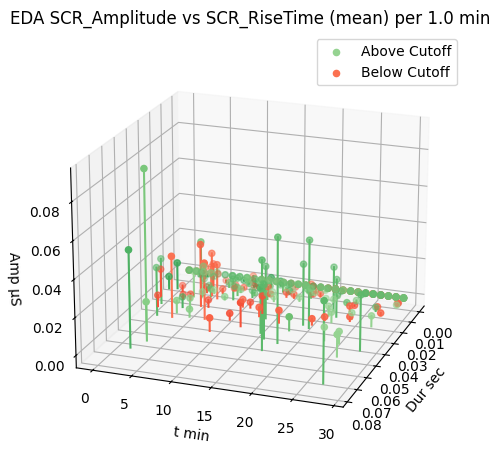

For last 0.5 hour
Subj Above Cutoff (Greens) [1, 2, 3, 4, 8, 9, 10]
Nb of sums (7, 30) : [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005627957143972522, 0.0, 0.0, 0.0], [0.002526524544929437, 0.002650070951018109, 0.00043015337805015185, 0.0, 0.0, 0.0029432657569707734, 0.0007654409582249489, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004014966336297167, 0.0, 0.015398775907142516, 0.0, 0.00713427518981254, 0.020418034555898697, 0.01294253374532341, 0.001

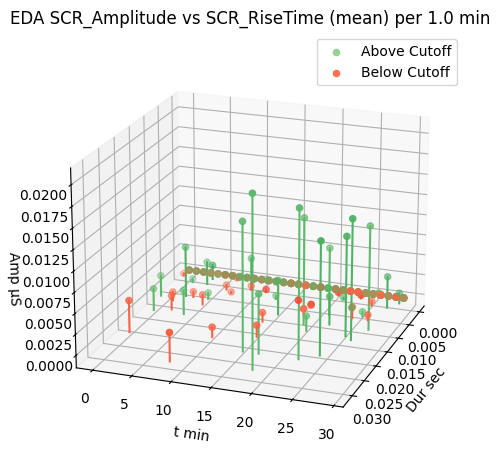

For whole duration 1.4999305555555555 hour
Subj Above Cutoff (Greens) [1, 2, 3, 4, 8, 9, 10]
Nb of sums (7, 90) : [[0.0, 0.0, 0.0, 0.0, 0.014097993153525015, 0.002606694616349756, 0.0019211814878647934, 0.0002417582560434092, 0.0, 0.00018525503507943223, 0.00022652121866518243, 0.0, 0.0, 0.0010767296304480477, 0.0024290833553194504, 0.00035715689573355105, 0.0, 0.0021219649920354235, 0.0005226624397976419, 0.0005622170281030025, 0.0006524711503663803, 0.0007535234079144419, 0.005219582901610536, 0.005505866069379813, 0.007142483574255079, 0.0033201649789667415, 0.006583924769364632, 0.011739432157778711, 0.005773759828701458, 0.0008270222488505971, 0.00498303789458011, 0.010353475460889496, 0.0030331205088372673, 0.007216958488054009, 0.010757596289298794, 0.005489437693529211, 0.007255607030801339, 0.0022950900627120023, 0.0020938573856455257, 0.006498159983014064, 0.0026840002709885144, 0.0009694835860855008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

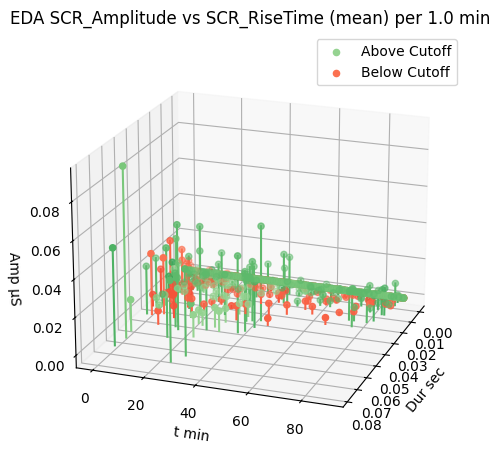

In [15]:
# Per X sec analysis of Phasic peak Amplitudes to Durations Ratio
# value at each instant t is averaged over X(=step_t_sec) sec.
EDA_SAMPLING_FREQ = 4
start_t_sec = 0
step_t_sec = int(1 * 60) 

def cutoff_based_analysis_3D(_df, suj_below_cutoff, suj_above_cutoff):    
    
    
    # Above cutoff
    cmap="Greens"
    label="Above Cutoff"
    print(f"Subj {label} ({cmap})", suj_above_cutoff)
    ax = EFA.phasic_feature_anlaysis_amp_wrt_dur_3D(_df, feature_Amp='SCR_Amplitude', feature_Dur='SCR_RiseTime', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=suj_above_cutoff,cmap=cmap, label=label, show=False)
    # ax = EFA.phasic_feature_anlaysis_amp_wrt_pno(_df, feature_Amp='SCR_Amplitude', feature_Pno='SCR_Peaks', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=suj_above_cutoff,cmap=cmap, label=label, show=False)
    
    # Below cutoff
    cmap="Reds"
    label="Below Cutoff"

    if exam == 'Final': # Eliminate student 9
        suj_below_cutoff = [s for s in suj_below_cutoff if s != 9]

    print(f"Subj {label} ({cmap})", suj_below_cutoff)
    EFA.phasic_feature_anlaysis_amp_wrt_dur_3D(_df, feature_Amp='SCR_Amplitude', feature_Dur='SCR_RiseTime', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=suj_below_cutoff,cmap=cmap, label=label, show=True, prev_ax=ax)
    # EFA.phasic_feature_anlaysis_amp_wrt_pno(_df, feature_Amp='SCR_Amplitude', feature_Pno='SCR_Peaks', t_sec_ref=start_t_sec, t_sec_step=step_t_sec, EDA_SAMPLING_FREQ=EDA_SAMPLING_FREQ, subjects=suj_below_cutoff,cmap=cmap, label=label, show=True)


time_cutoff = 30 * 60 # sec 
# time_cutoff = df_features['t_sec'].iloc[-1]/2
print(f"For first {(time_cutoff) / (60*60) } hour")
cutoff_based_analysis_3D(df_features[df_features['t_sec'] < time_cutoff].reset_index(drop=True), suj_below_cutoff=suj_below_cutoff, suj_above_cutoff=suj_above_cutoff) # Warning : The mask 'df['t_sec'] > 60*60' can make t_sec values irrelevant while calling phasic_feature_anlaysis_amp_wrt_dur()

print(f"For last {(time_cutoff) / (60*60) } hour")
cutoff_based_analysis_3D(df_features[df_features['t_sec'] >= (df_features['t_sec'].iloc[-1] - time_cutoff)].reset_index(drop=True), suj_below_cutoff=suj_below_cutoff, suj_above_cutoff=suj_above_cutoff) # Warning : The mask 'df['t_sec'] > 60*60' can make t_sec values irrelevant while calling phasic_feature_anlaysis_amp_wrt_dur()

print(f"For whole duration {(df_features['t_sec'].iloc[-1]) / (60*60) } hour")
cutoff_based_analysis_3D(df_features.reset_index(drop=True), suj_below_cutoff=suj_below_cutoff, suj_above_cutoff=suj_above_cutoff) # Warning : The mask 'df['t_sec'] > 60*60' can make t_sec values irrelevant while calling phasic_feature_anlaysis_amp_wrt_dur()
